In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline 

In [3]:
import requests

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [5]:
response = requests.get(url)

In [6]:
#replacement of !wget command
if response.status_code == 200:
    with open("FuelConsumptionCo2.csv","wb") as file:
        file.write(response.content)
else:
    print("Failed to download the file")

In [7]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
#Summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


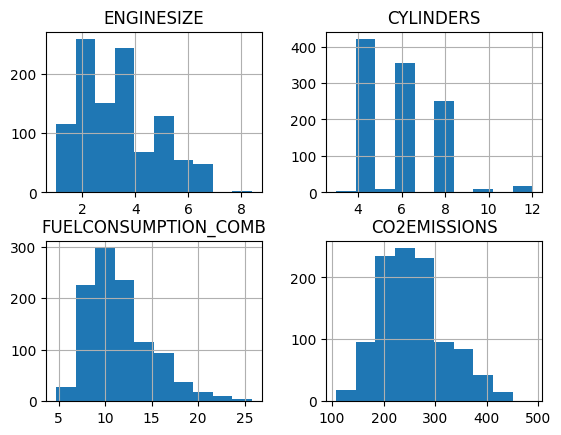

In [11]:
#we can plot this features
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

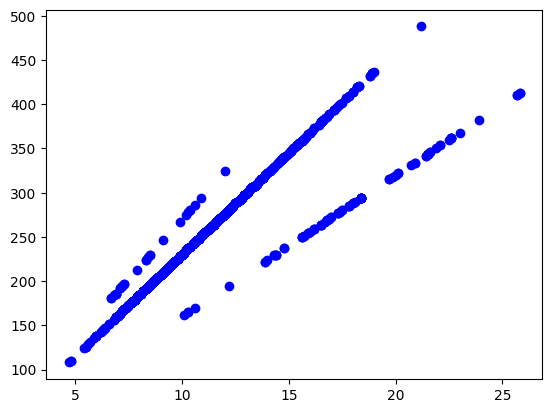

In [12]:
#Now, let's plot each of these features against the Emission, to see how linear their relationship is
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color ='blue')

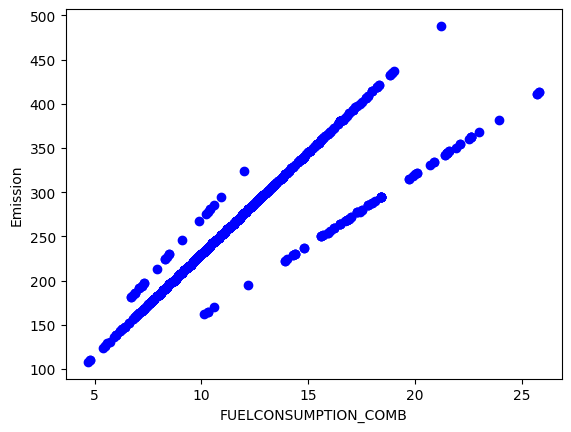

In [13]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color ='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

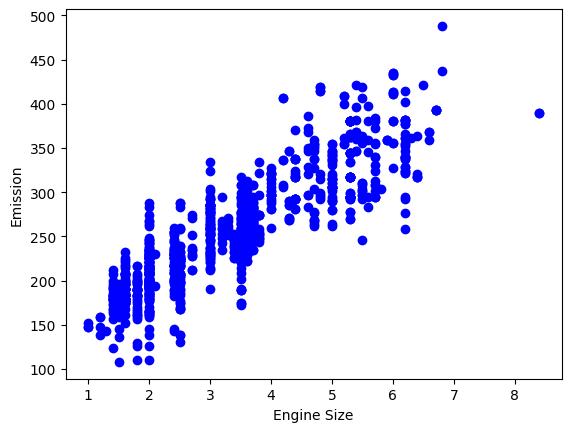

In [14]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

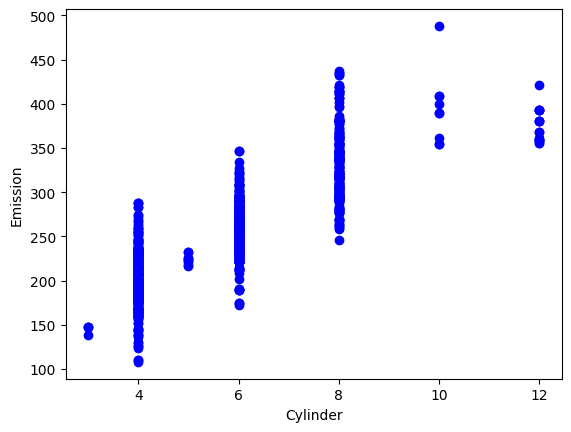

In [15]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

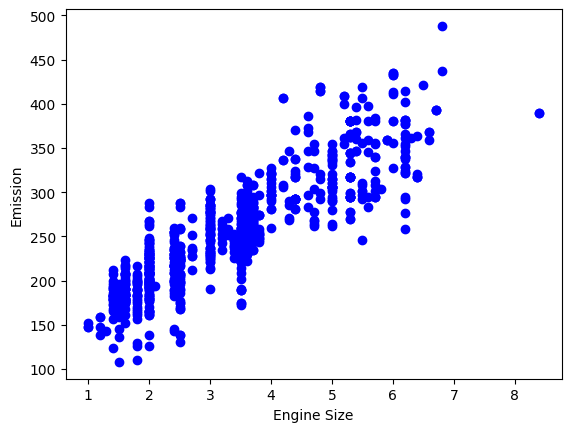

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = "blue")
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [19]:
!pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2981 sha256=fccd1ec2240be35dcfbfa8cffa7d5d906274adca8c18bd9115eb78bbd05c7316
  Stored in directory: c:\users\sshah\appdata\local\pip\cache\wheels\e8\33\44\f35b7e846629ac67489632a758c99e5cb17e800d21dcf4c568
Successfully built sklearn


In [20]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 401.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 2.6 MB/s eta 0:00:04
   ---------------------------------------- 0.1/9.1 MB 1.3 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.1 MB 1.7 MB/s eta 0:00:06
    --------------------------------------- 0.2/9.1 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.1 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.5/9.1 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.1 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.9/9.1 MB 2.4 MB/s eta 0:00:04
   ---- ---

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
#The Coefficients
print("Coefficients :", regr.coef_)
print("Intercept :", regr.intercept_)

Coefficients : [[39.06781433]]
Intercept : [125.01825597]


In [27]:
from sklearn.metrics import r2_score

In [28]:
#Error Checking
test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("Mean abssolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of square %.2f" % np.mean(test_y_ - test_y) **2)
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean abssolute error: 21.93
Residual sum of square 5.84
R2-score: 0.79


In [32]:
train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
#The Coefficient
print("Coefficient:" , regr.coef_)
print("Intercept", regr.intercept_)

Coefficient: [[16.64402331]]
Intercept [63.84276362]


Text(0, 0.5, 'Emission')

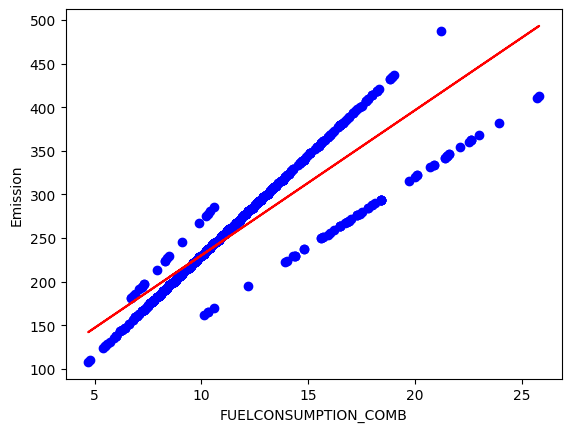

In [33]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

In [35]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 138.12
Residual sum of squares (MSE): 20831.52
R2-score: -4.64


In [36]:
train_x = train[["FUELCONSUMPTION_COMB"]]
test_x = test[["FUELCONSUMPTION_COMB"]]

In [37]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [39]:
test_y = regr.predict(test_x)

In [41]:
print("Mean Square Error %.2f" %np.mean(np.absolute(test_y - test_y)))

Mean Square Error 0.00


In [43]:
predictions = regr.predict(test_x)